In [1]:
# importing the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading/loading the train dataset to dtrain
dtrain = pd.read_csv('train.csv')
dtrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#reading/loading the test dataset to dtest
dtest = pd.read_csv('test.csv')
dtest.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
# checking information about the features
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Data Cleaning and Pre-processing

In [5]:
# Categorical features in train set
print('Categorical Variables:')
tcategorical_variables = dtrain.select_dtypes(include=['object']).columns 
for col in tcategorical_variables:
    print(col)

Categorical Variables:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [6]:
# Numerical features in train set
print('Numerical Variables:')
tnumerical_variables = dtrain.select_dtypes(exclude=['object']).columns
for col in tnumerical_variables:
    print(col)

Numerical Variables:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [7]:
# Categorical features in test set
print('Categorical Variables:')
categorical_variables = dtest.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [8]:
# Numerical features in test set
print('Numerical Variables:')
numerical_variables = dtest._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [9]:
# number of null values for each features in the test set
for col in dtest.columns:
    print(col, dtest[col].isnull().sum())

PassengerId 0
HomePlanet 87
CryoSleep 93
Cabin 100
Destination 92
Age 91
VIP 93
RoomService 82
FoodCourt 106
ShoppingMall 98
Spa 101
VRDeck 80
Name 94


In [10]:
# number of null values for each features in the train set
for col in dtrain.columns:
    print(col, dtrain[col].isnull().sum())

PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


In [11]:
# Replacing None values with the most commmon value for categorical variables in the train set except for Name column because different people can bear the same name it is meant to be a unique value
for ct_col in tcategorical_variables:
    if ct_col != 'Name':
        dtrain[ct_col] = dtrain[ct_col].fillna(dtrain[ct_col].mode()[0])
    print(ct_col, dtrain[ct_col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 200


In [12]:
# Replacing None values with the most commmon value for categorical variables in the test except for Name column because different people can bear the same name it is meant to be a unique value.
for ct_col in categorical_variables:
    if ct_col != 'Name':
        dtest[ct_col] = dtest[ct_col].fillna(dtest[ct_col].mode()[0])
    print(ct_col, dtest[ct_col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 94


In [13]:
# Replacing None values with the average(mean)value for numerical variables in the train set
for num_col in tnumerical_variables:
    dtrain[num_col] = dtrain[num_col].fillna(dtrain[num_col].mean())
    print(num_col, dtrain[num_col].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0


In [14]:
# Replacing None values with the average(mean)value for numerical variables in the test set
for num_col in numerical_variables:
    dtest[num_col] = dtest[num_col].fillna(dtest[num_col].mean())
    print(num_col, dtest[num_col].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0


In [15]:
# dropping the name column from the train dataset as the null values can't be replaced and dont want to drop the columns because that would be 200 columns less according to dataset information
dtrain.drop('Name', axis=1, inplace=True)
dtrain

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [16]:
# dropping the name column from the test dataset 
dtest.drop('Name', axis=1, inplace=True)
dtest.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [17]:
#updating the categorical variables for train
tcategorical_variables = dtrain.select_dtypes(include=['object']).columns
tcategorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

In [18]:
#updating the categorical variables for test
categorical_variables = dtest.select_dtypes(include=['object']).columns
categorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

# Data Analysis and Visualization

In [19]:
# description of the dataset(the numneric variables)
dtrain.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [20]:
# description of the categorical variables
dtrain[tcategorical_variables].describe()

,PassengerId,HomePlanet,Cabin,Destination
count,8693,8693,8693,8693
unique,8693,3,6560,3
top,0001_01,Earth,G/734/S,TRAPPIST-1e
freq,1,4803,207,6097


In [21]:
# description of the dataset(the numneric variables)
dtest.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.027384,601.162847,1508.609201,554.357251,1103.913087,1235.274606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,79.000000,143.000000,51.000000,83.000000,53.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [22]:
# description of the categorical variables
dtest[categorical_variables].describe()

,PassengerId,HomePlanet,Cabin,Destination
count,4277,4277,4277,4277
unique,4277,3,3265,3
top,0013_01,Earth,G/160/P,TRAPPIST-1e
freq,1,2350,108,3048


(array([ 591.,  649., 2089., 2155., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

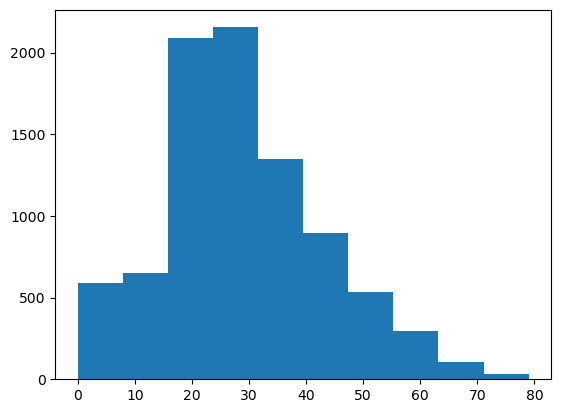

In [23]:
# the most common age is between 16 to 33 years old
plt.hist(dtrain['Age'])

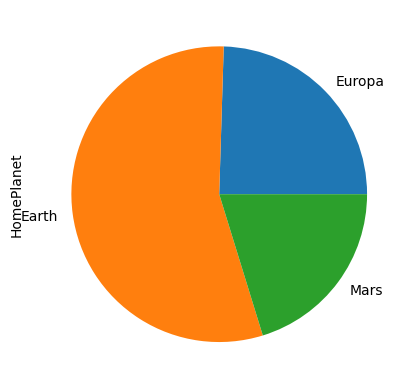

In [24]:
# this shows that majority of the people are from Earth
dtrain['HomePlanet'].value_counts(sort=False).plot.pie()
plt.show()

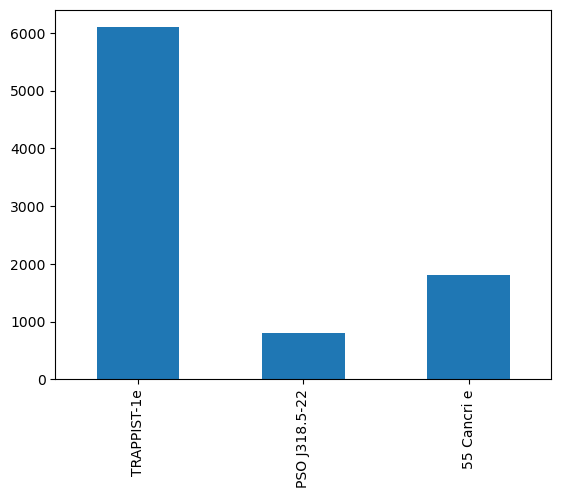

In [25]:
# most passengers were heading to TRAPPIST-1e
dtrain['Destination'].value_counts(sort=False).plot.bar()
plt.show()

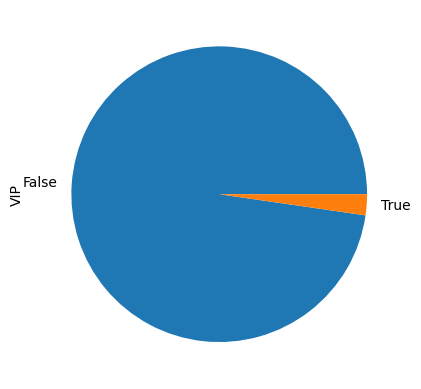

In [26]:
# mOST PEOPLE didn't belong to the VIP
dtrain['VIP'].value_counts().plot.pie()
plt.show()

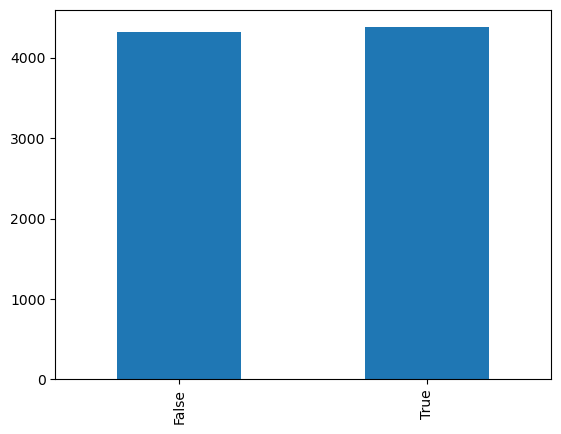

In [27]:
# in accordance to the train set, it is seen that almost equal numbers of pasenger were either transported or not
dtrain['Transported'].value_counts(sort=False).plot.bar()
plt.show()

In [28]:
# check for the number of unique values for some features of the categorical variables
dtrain['HomePlanet'].nunique()

3

In [29]:
dtrain['Destination'].nunique()

3

In [30]:
dtrain['Cabin'].nunique()

6560

In [31]:
dtrain['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [32]:
#checking for the unique values
dtrain['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [33]:
dtrain['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [34]:
# mapping the values of HomePlanet to a numeric value for the train set
dtrain['HomePlanet'] = dtrain['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
dtrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [35]:
# mapping the values of Destination to a numeric value for the train set
dtrain['Destination'] = dtrain['Destination'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2}).astype(int)
dtrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,1,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,1,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [36]:
# mapping the values of Destination to a numeric value for the test set
dtest['Destination'] = dtest['Destination'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2}).astype(int)
dtest.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,0,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,0,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,2,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,0,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,0,20.0,False,10.0,0.0,635.0,0.0,0.0


In [37]:
# mapping the values of HomePlanet to a numeric value for the test set
dtest['HomePlanet'] = dtest['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
dtest.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,True,G/3/S,0,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,False,F/4/S,0,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,True,C/0/S,2,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,False,C/1/S,0,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,False,F/5/S,0,20.0,False,10.0,0.0,635.0,0.0,0.0


In [38]:
# taking out the cabin and passengerid column as it isnt useful for the result/prediction in the test set
dtest.drop(['Cabin','PassengerId'], axis=1, inplace=True)

In [39]:
dtest.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,True,0,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0,False,0,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,1,True,2,31.0,False,0.0,0.0,0.0,0.0,0.0
3,1,False,0,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0,False,0,20.0,False,10.0,0.0,635.0,0.0,0.0


In [40]:
# taking out the cabin and passengerid column as it isnt useful for the result/prediction in the train set
dtrain.drop(['Cabin','PassengerId'], axis=1, inplace=True)
dtrain.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True


# Modeling

In [41]:
#train split
X_train, y_train = dtrain.iloc[:, :-1], dtrain.iloc[:, -1]
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [42]:
# importing the necessary algorithms 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [43]:
# modelling with logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
#prediction(ouutput)
lr_predict = lr.predict(dtest)
lr_predict

array([ True, False,  True, ...,  True,  True,  True])

In [45]:
# modelling with KNN
kn =KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
#prediction(ouutput)
kn_predict = kn.predict(dtest)
kn_predict

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([False, False,  True, ...,  True,  True, False])

In [47]:
# cross validation for assessing the quality of the machine learning model(KNN)
cr_knn = cross_val_score(kn, X_train, y_train, cv=5)
cr_knn

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

array([0.75560667, 0.76250719, 0.75848189, 0.76352129, 0.7721519 ])

In [48]:
msc = MinMaxScaler()

In [49]:
#scalling dtrain 
dtrain_sc = pd.DataFrame(msc.fit_transform(dtrain), columns=dtrain.columns)

In [50]:
dtrain_sc.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.5,0.0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0
2,0.5,0.0,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0
3,0.5,0.0,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0
4,0.0,0.0,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0


In [51]:
dtrain_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   float64
dtypes: float64(11)
memory usage: 747.2 KB


In [52]:
# cross validating for the second time after scalling
skn =KNeighborsClassifier()
scr_knn = cross_val_score(skn, X_train, y_train, cv=5)
scr_knn

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

array([0.75560667, 0.76250719, 0.75848189, 0.76352129, 0.7721519 ])

In [53]:
# cross validation for assessing the quality of the machine learning model(Decision Tree)
dt = DecisionTreeClassifier()
cr_dt = cross_val_score(dt, X_train, y_train, cv=5)
cr_dt

array([0.74583094, 0.73317999, 0.71247844, 0.73130035, 0.72669735])

In [54]:
# modelling with Decision Tree
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
#prediction(output)
dt_predict = dt.predict(dtest)
dt_predict

array([ True, False,  True, ...,  True,  True, False])

In [56]:
# modelling with support vector machine
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [57]:
#prediction(output)
svm_predict = svm.predict(dtest)
svm_predict

array([ True, False,  True, ...,  True,  True,  True])

In [58]:
# cross validation for assessing the quality of the machine learning model(SVM)
cr_svm = cross_val_score(svm, X_train, y_train, cv=5)
cr_svm

array([0.76308223, 0.77343301, 0.78953422, 0.80667434, 0.79919448])

In [59]:
# modelling with GradientBoosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [60]:
#prediction(ouutput)
gb_predict = gb.predict(dtest)
gb_predict

array([ True, False,  True, ...,  True,  True,  True])

In [61]:
# cross validation for assessing the quality of the machine learning model(GradientBoosting)
cr_gb = cross_val_score(gb, X_train, y_train, cv=5)
cr_gb

array([0.78780909, 0.78838413, 0.786659  , 0.80379747, 0.80494822])

In [62]:
# calling back passengerid for the result
passengerid = pd.read_csv('test.csv')['PassengerId']

In [63]:
# creating a dataframe to show the result 
result = pd.DataFrame({'PassengerId': passengerid, 'Transported': gb_predict})
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [64]:
# saving the result as a csv file
result.to_csv('result.csv', index=False)

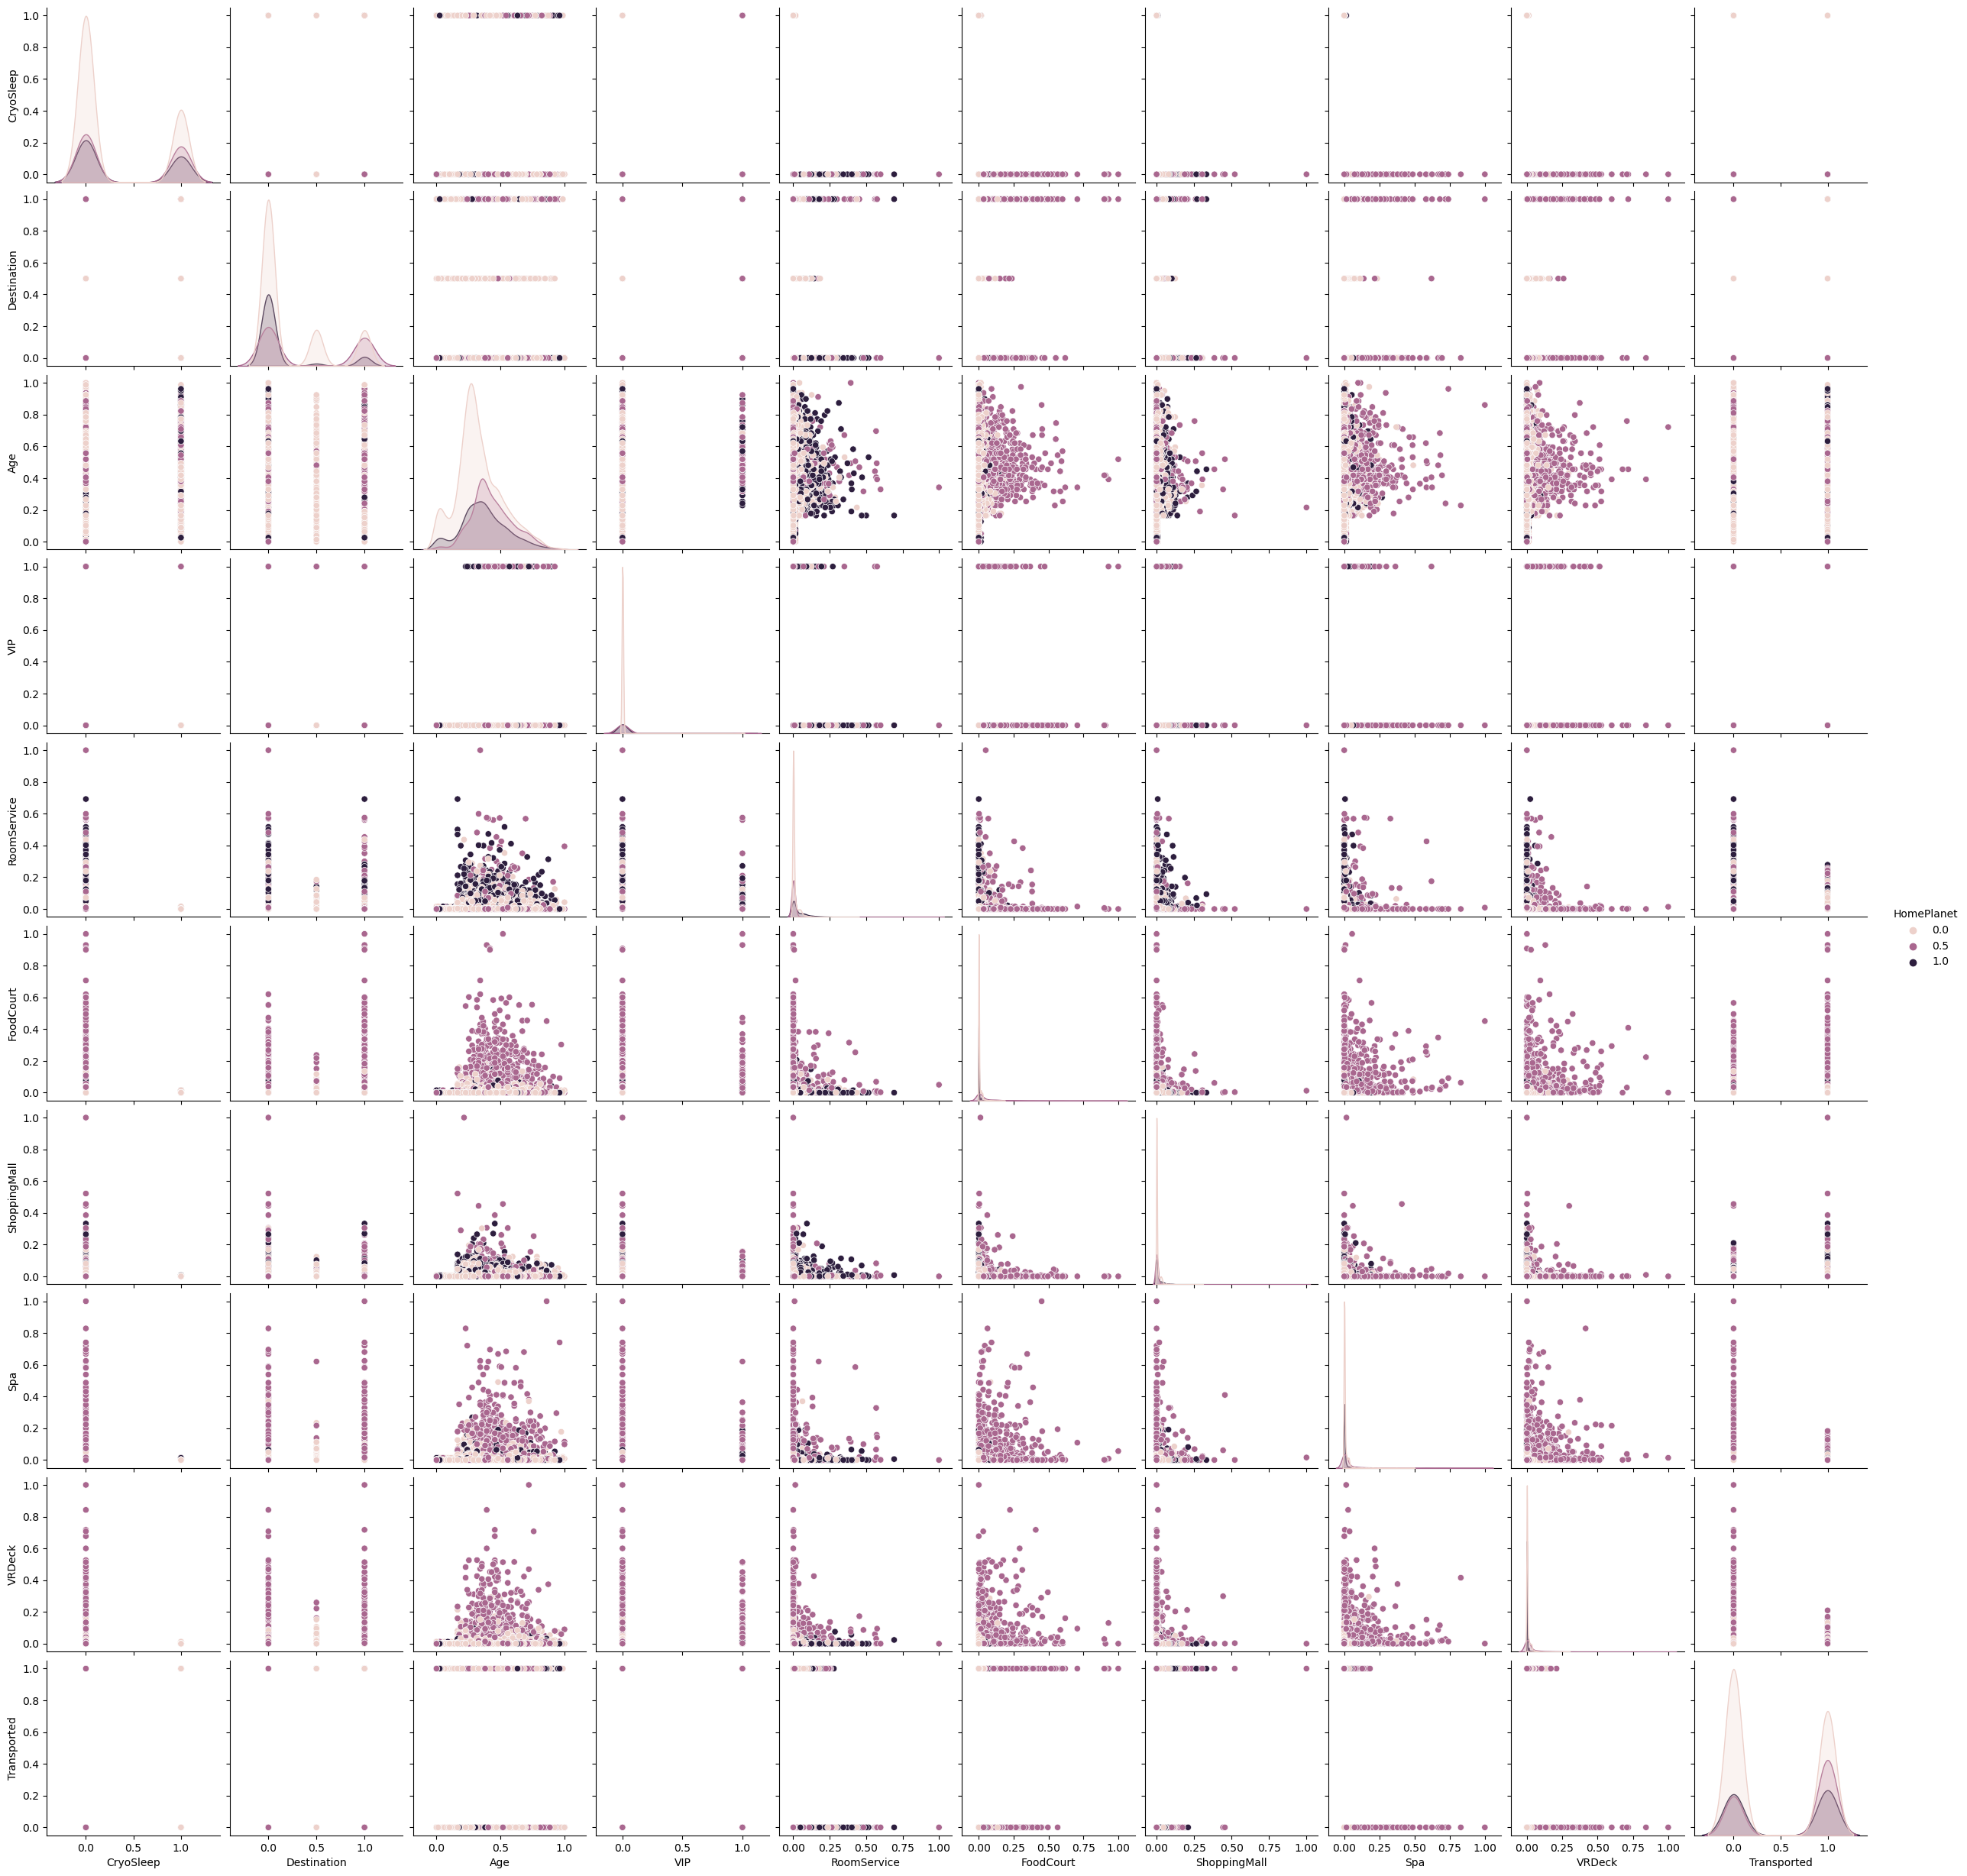

In [65]:
# plotting a pairpot with respect to the HomePlanet column
sns.pairplot(dtrain_sc, hue='HomePlanet')

In [67]:
# classification report to understanding the quality of the prediction
# This had the best accuracy
print(classification_report(gb_predict, lr_predict))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      1940
        True       0.95      0.95      0.95      2337

    accuracy                           0.94      4277
   macro avg       0.94      0.94      0.94      4277
weighted avg       0.94      0.94      0.94      4277



In [68]:
print(classification_report(kn_predict, lr_predict))

              precision    recall  f1-score   support

       False       0.89      0.81      0.84      2122
        True       0.82      0.90      0.86      2155

    accuracy                           0.85      4277
   macro avg       0.86      0.85      0.85      4277
weighted avg       0.86      0.85      0.85      4277



In [ ]:
# trying some more algorithms like naive bayes and random forest Classifier

In [69]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [70]:
nb_predict = nb.predict(dtest)
nb_predict

array([ True, False,  True, ...,  True,  True,  True])

In [71]:
cr_nb = cross_val_score(nb, X_train, y_train, cv=5)
cr_nb

array([0.68832662, 0.67510063, 0.70500288, 0.71576525, 0.69159954])

In [72]:
print(classification_report(kn_predict, nb_predict))

              precision    recall  f1-score   support

       False       0.94      0.51      0.67      2122
        True       0.67      0.97      0.79      2155

    accuracy                           0.74      4277
   macro avg       0.81      0.74      0.73      4277
weighted avg       0.81      0.74      0.73      4277



In [73]:
print(classification_report(dt_predict, kn_predict))

              precision    recall  f1-score   support

       False       0.77      0.84      0.80      1967
        True       0.85      0.79      0.82      2310

    accuracy                           0.81      4277
   macro avg       0.81      0.81      0.81      4277
weighted avg       0.81      0.81      0.81      4277



In [74]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
rf_predict = rf.predict(dtest)
rf_predict

array([ True, False,  True, ...,  True,  True, False])

In [76]:
cr_rf = cross_val_score(rf, X_train, y_train, cv=5)
cr_rf

array([0.78320874, 0.76768258, 0.77573318, 0.78365938, 0.78941312])

In [79]:
# an ensemble classifier
bc = BaggingClassifier()

In [80]:
bc.fit(X_train, y_train)

BaggingClassifier()

In [81]:
bc_predict = bc.predict(dtest)
bc_predict

array([ True, False,  True, ...,  True,  True, False])

In [82]:
print(classification_report(bc_predict, rf_predict))

              precision    recall  f1-score   support

       False       0.93      0.93      0.93      2128
        True       0.93      0.93      0.93      2149

    accuracy                           0.93      4277
   macro avg       0.93      0.93      0.93      4277
weighted avg       0.93      0.93      0.93      4277



In [83]:
bc_rf = cross_val_score(bc, X_train, y_train, cv=5)
bc_rf

array([0.7786084 , 0.7653824 , 0.76020702, 0.76697353, 0.78826237])

In [84]:
print(classification_report(rf_predict, bc_predict))

              precision    recall  f1-score   support

       False       0.93      0.93      0.93      2109
        True       0.93      0.93      0.93      2168

    accuracy                           0.93      4277
   macro avg       0.93      0.93      0.93      4277
weighted avg       0.93      0.93      0.93      4277



In [85]:
bcresult = pd.DataFrame({'PassengerId': passengerid, 'Transported': bc_predict})
bcresult

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [87]:
bcresult.to_csv('bcresult.csv', index=False)

In [88]:
lrresult = pd.DataFrame({'PassengerId': passengerid, 'Transported': lr_predict})
lrresult

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [89]:
knresult = pd.DataFrame({'PassengerId': passengerid, 'Transported': kn_predict})
knresult

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [90]:
dtresult = pd.DataFrame({'PassengerId': passengerid, 'Transported': dt_predict})
dtresult

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [91]:
svmresult = pd.DataFrame({'PassengerId': passengerid, 'Transported': svm_predict})
svmresult

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [92]:
nbresult = pd.DataFrame({'PassengerId': passengerid, 'Transported': nb_predict})
nbresult

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [93]:
rfresult = pd.DataFrame({'PassengerId': passengerid, 'Transported': rf_predict})
rfresult

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [94]:
lrresult.to_csv('lrresult.csv', index=False)

In [95]:
knresult.to_csv('knresult.csv', index=False)

In [96]:
dtresult.to_csv('dtresult.csv', index=False)

In [97]:
svmresult.to_csv('svmresult.csv', index=False)

In [98]:
nbresult.to_csv('nbresult.csv', index=False)

In [99]:
rfresult.to_csv('rfresult.csv', index=False)